# Heart Attack Analysis & Prediction

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Read the dataset

In [2]:
df = pd.read_csv('/content/heart.csv')

# Initial Data Exploration

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.shape

(303, 14)

In [7]:
df['output'].value_counts()

,count
output,
1,165
0,138


**Initial observations:**
- It is a tiny clean dataset.
- All values are numerical and non-null.
- Target column is quite well-balanced.

# Exploratory Data Analysis

## Distribution of different variables

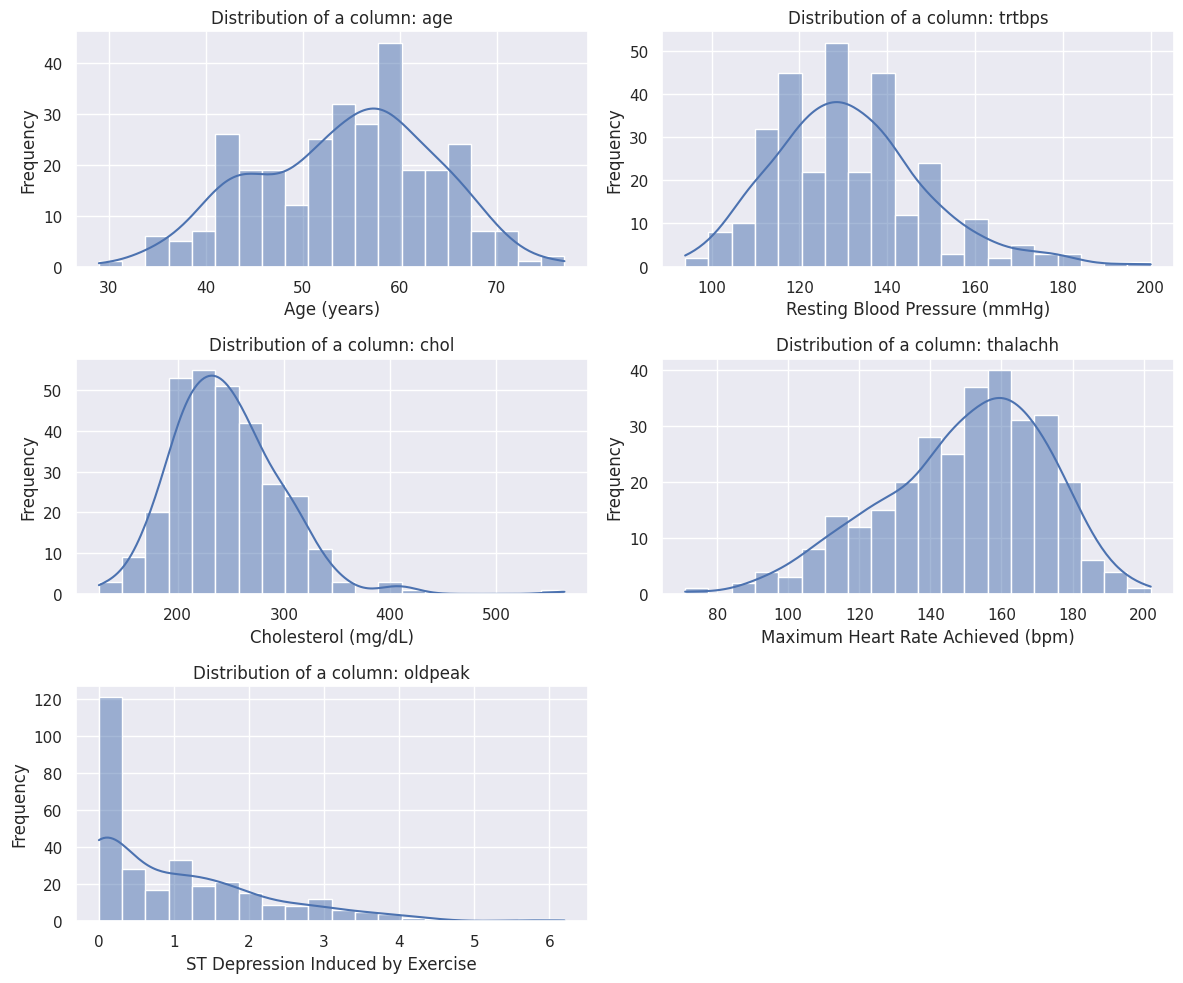

In [8]:
sns.set_theme()

num_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
labels = ['Age (years)', 'Resting Blood Pressure (mmHg)', 'Cholesterol (mg/dL)',
          'Maximum Heart Rate Achieved (bpm)', 'ST Depression Induced by Exercise']

# Set up the plot layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution
for i, (column, label) in enumerate(zip(num_columns, labels)):
    # Plotting distribution using seaborn's displot function
    sns.histplot(df[column], kde=True, ax=axes[i], bins=20)
    axes[i].set_xlabel(label)  # Set x-axis label
    axes[i].set_ylabel('Frequency')  # Set y-axis label
    axes[i].set_title(f'Distribution of a column: {column}') # Add title

# Turn off the last axis
axes[-1].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


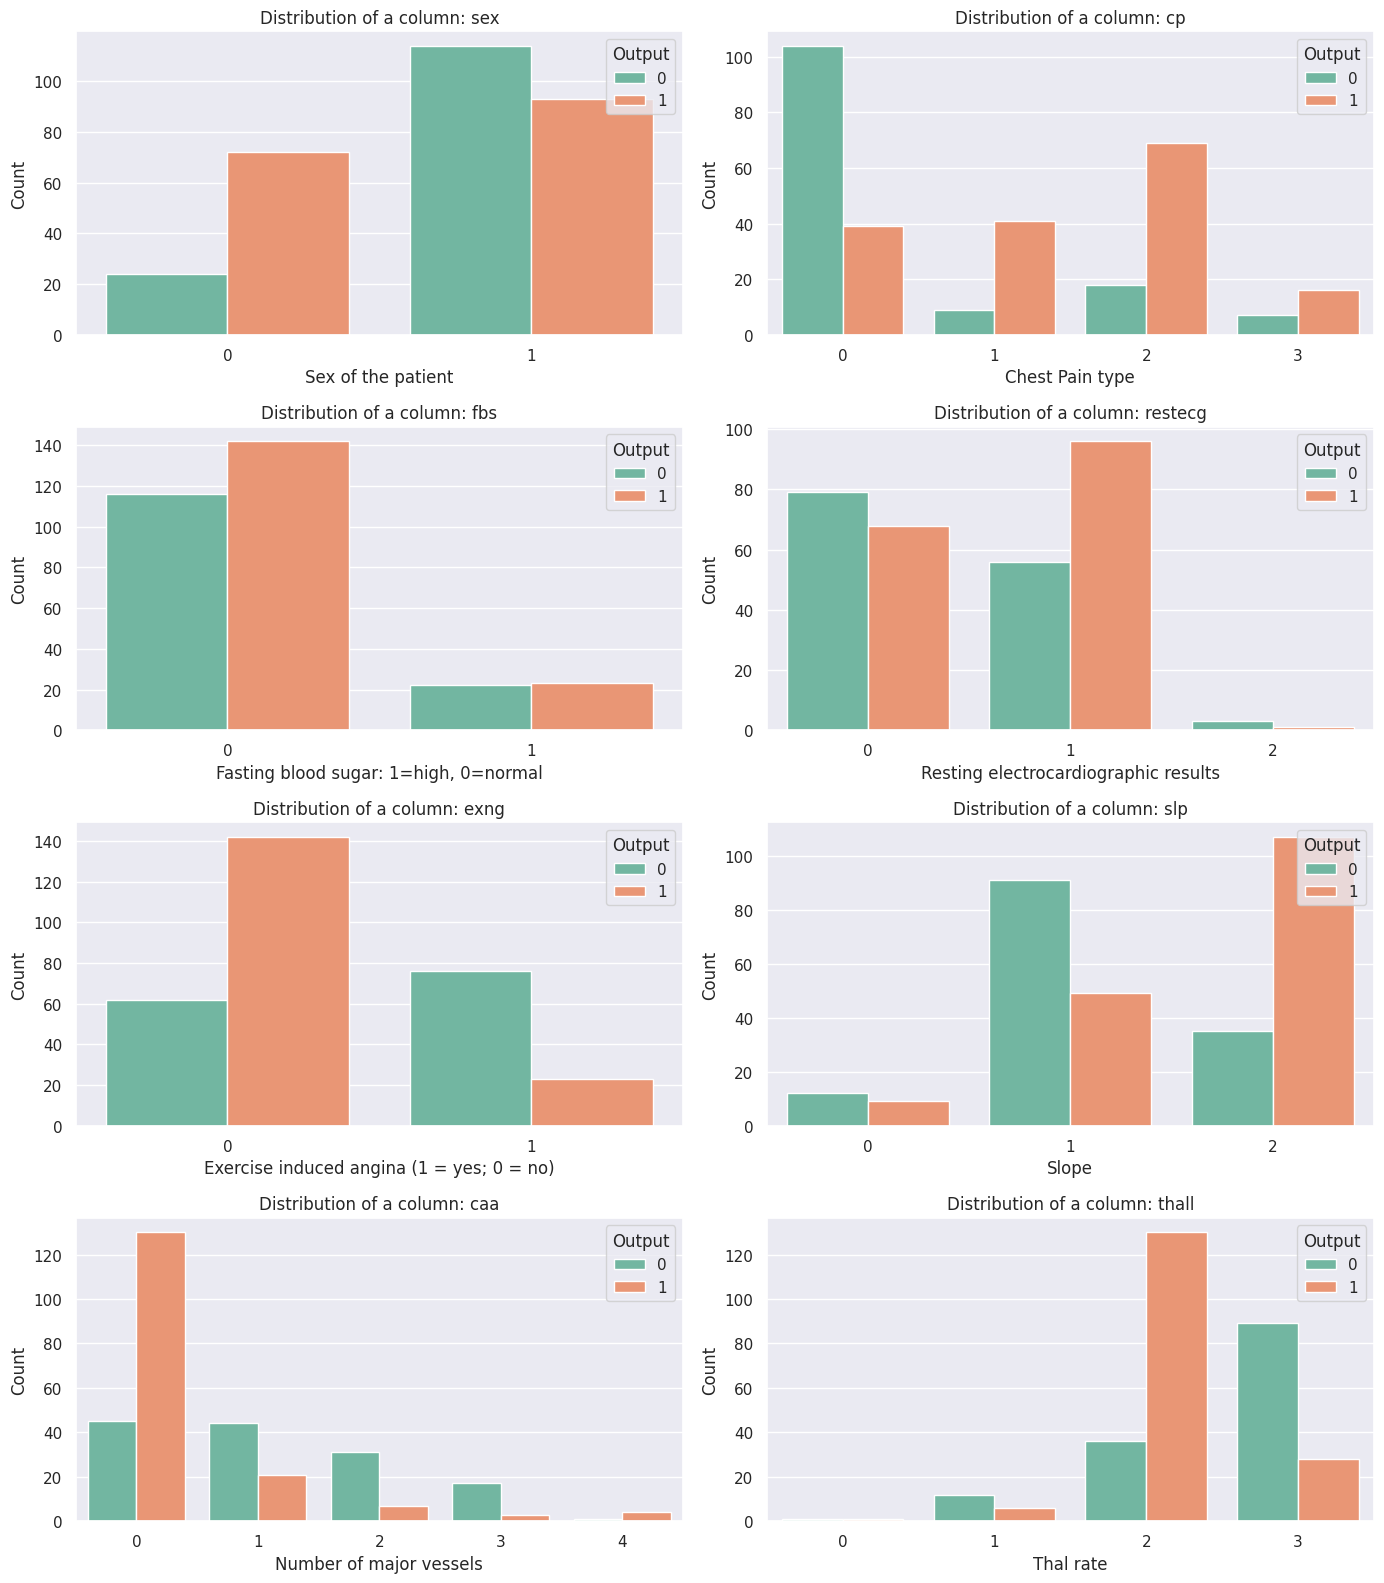

In [9]:
categ_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
labels = ['Sex of the patient', 'Chest Pain type', 'Fasting blood sugar: 1=high, 0=normal',
          'Resting electrocardiographic results', 'Exercise induced angina (1 = yes; 0 = no)',
          'Slope', 'Number of major vessels', 'Thal rate']

# Set up the plot layout
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column for plotting its distribution
for i, (column, label) in enumerate(zip(categ_columns, labels)):
    # Plotting distribution using seaborn's countplot function
    sns.countplot(data=df, x=column, hue='output', ax=axes[i], palette='Set2')
    axes[i].set_xlabel(label)  # Set x-axis label
    axes[i].set_ylabel('Count')  # Set y-axis label
    axes[i].legend(title='Output', loc='upper right')  # Add legend
    axes[i].set_title(f'Distribution of a column: {column}') # Add title

# Adjust layout
plt.tight_layout()
plt.show()


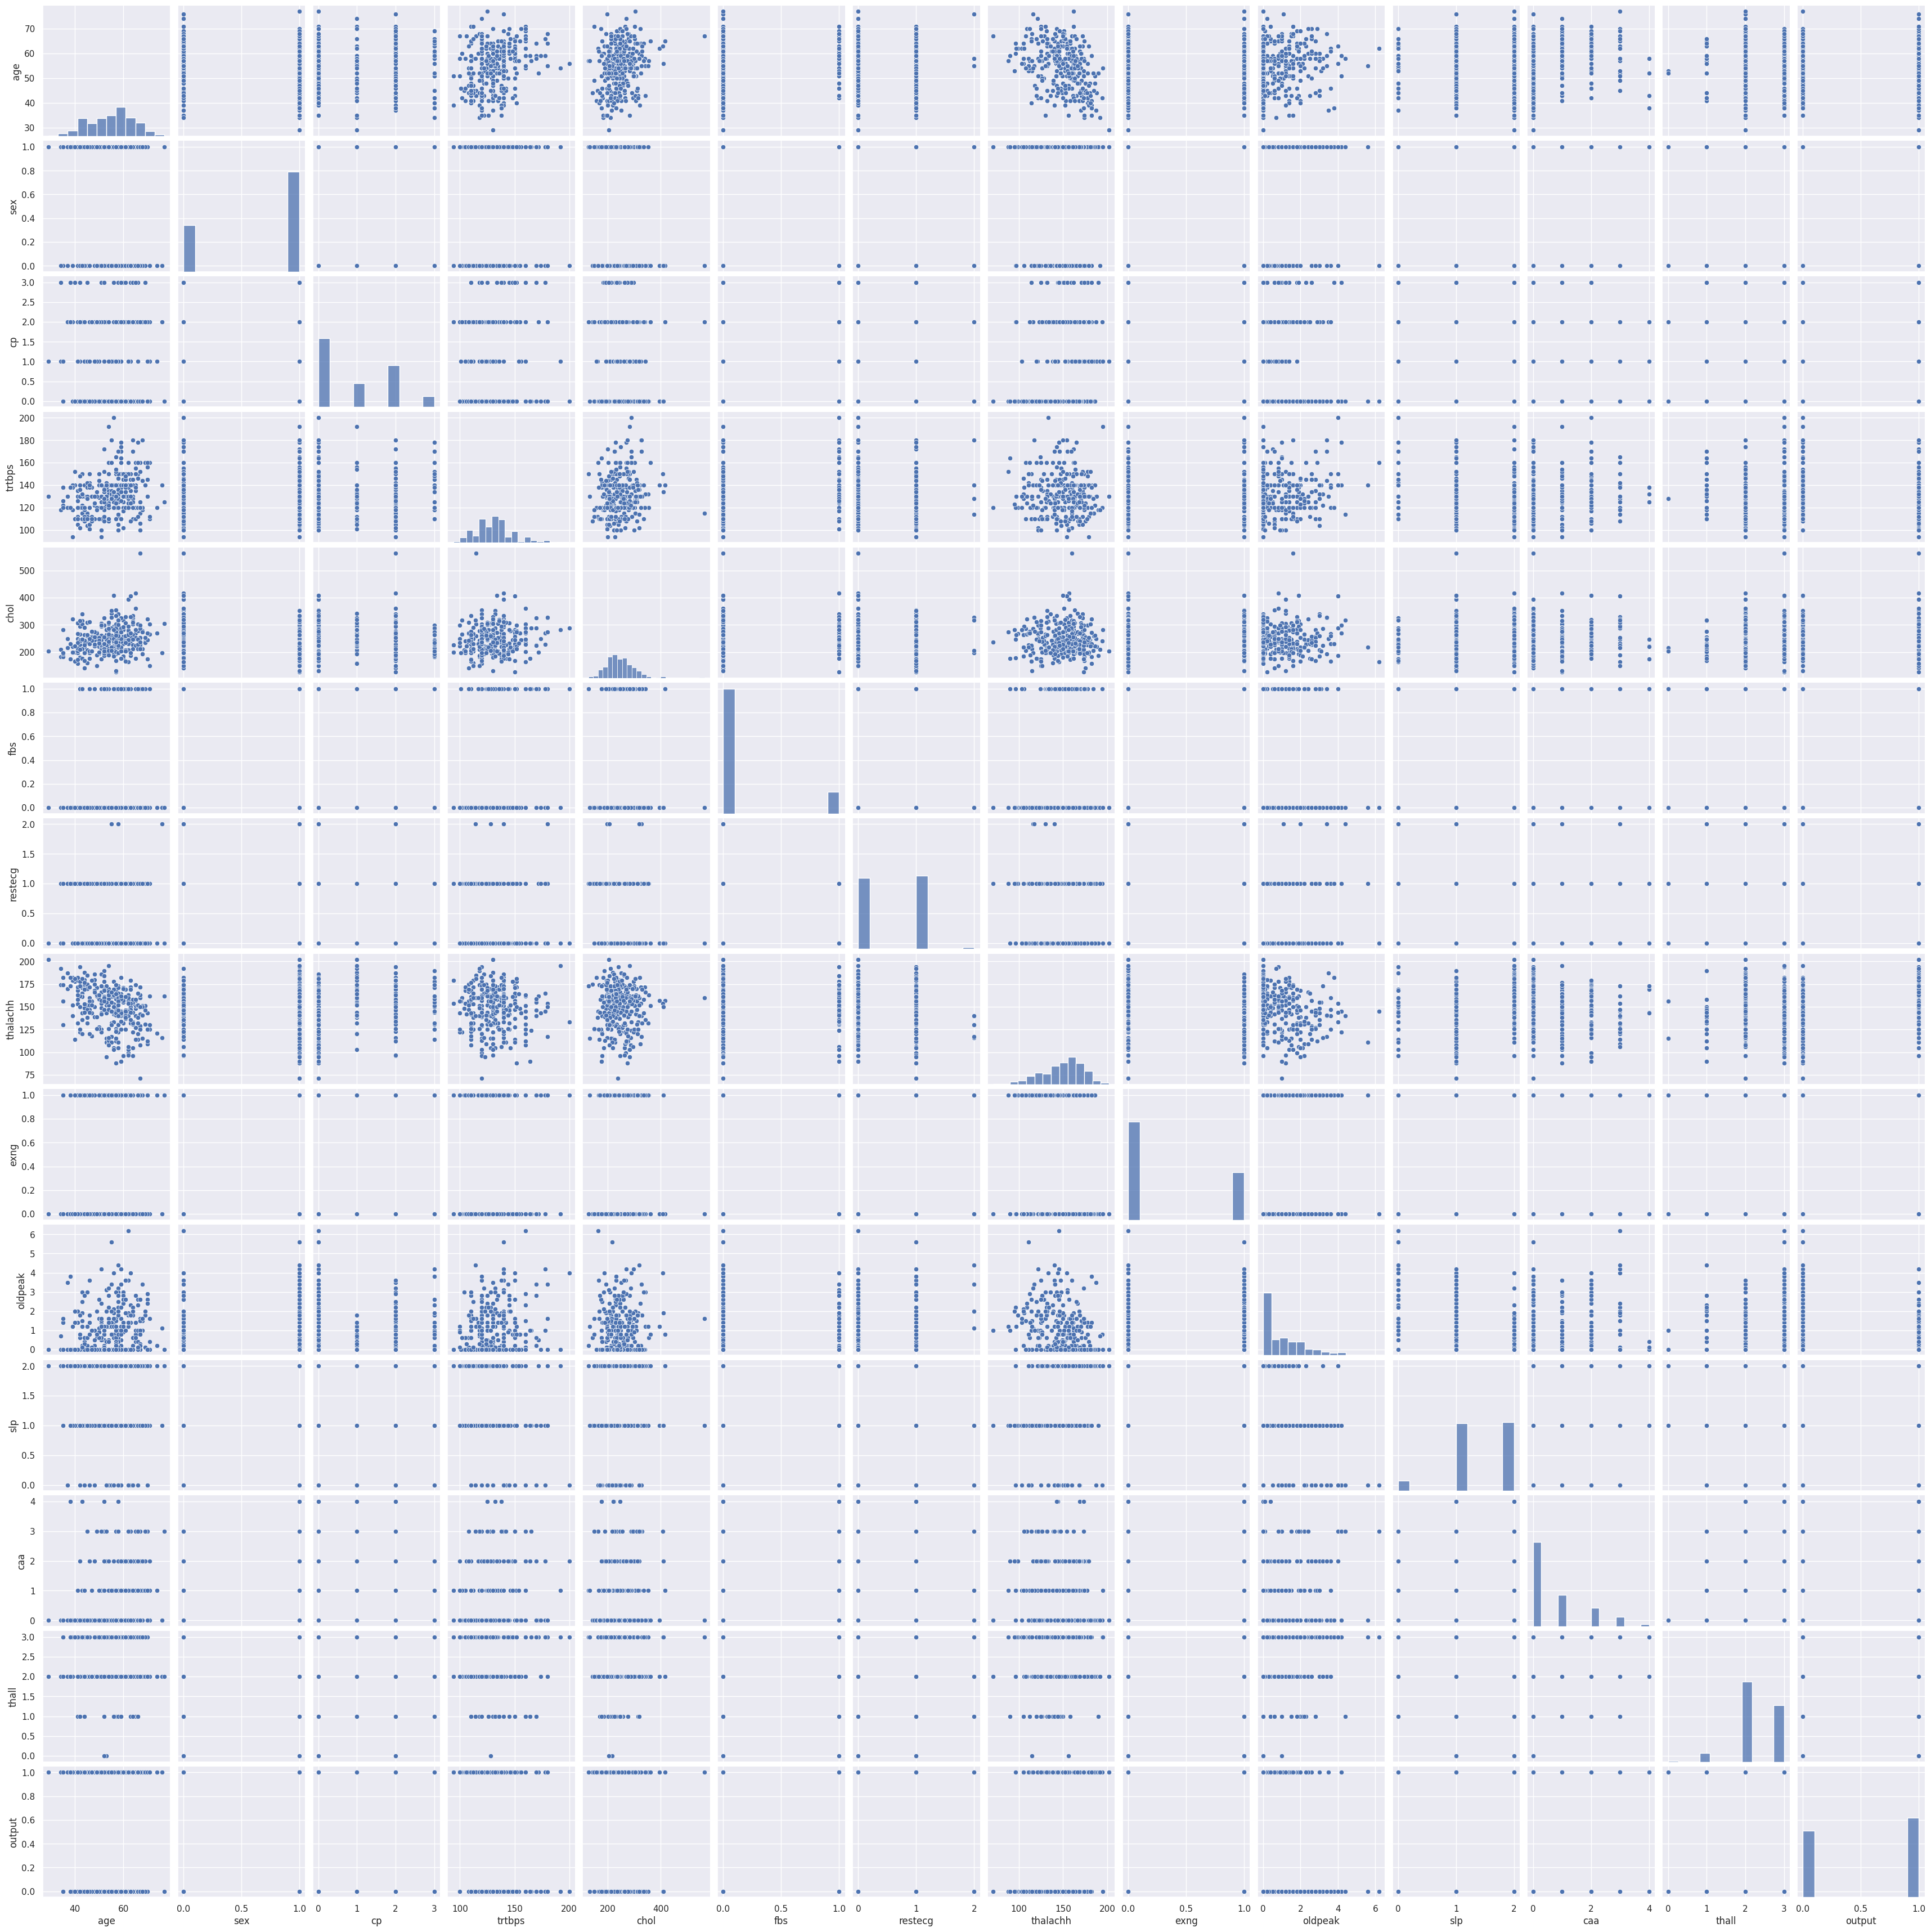

In [10]:
sns.pairplot(df);

## Visualization of Correlation between different variables

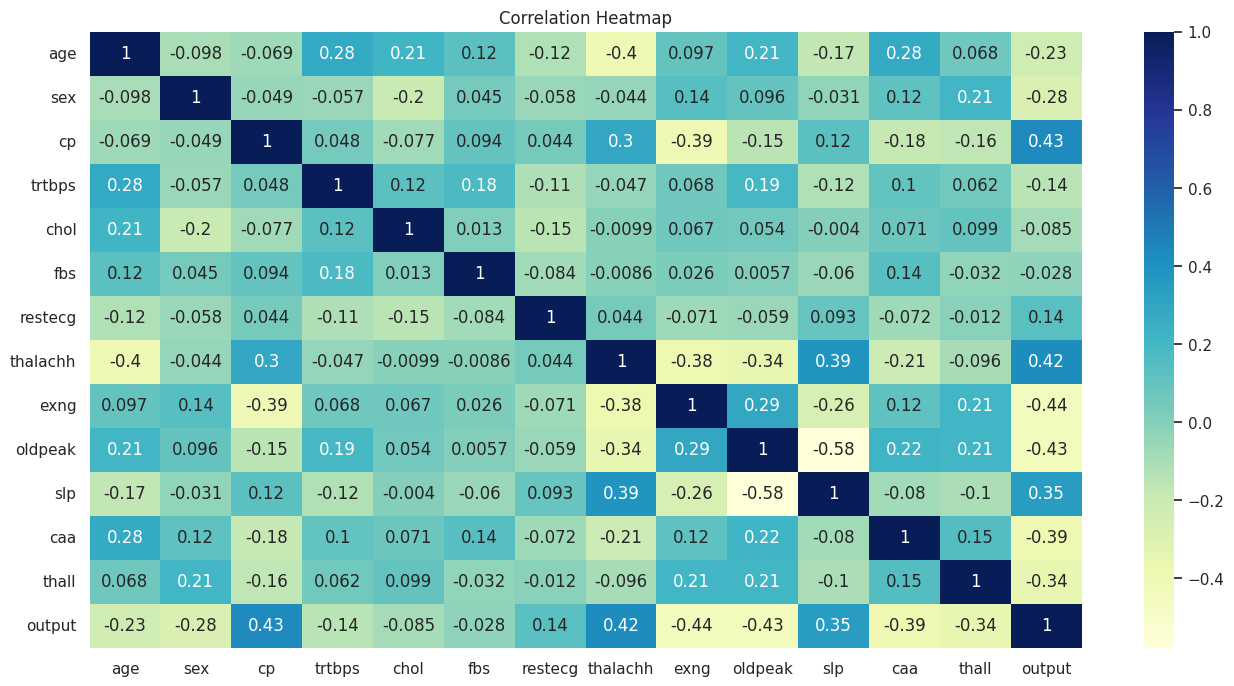

In [11]:
plt.figure(figsize=(16, 8))

# Compute correlation matrix for numeric features
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap with annotations
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True)

# Set title for the plot
plt.title('Correlation Heatmap')

plt.show()

We can see from weak to moderate correlation between different columns. The most notable negative correlation among our features is observed between 'slp' and 'oldpeak'. Let's visualize it with a scatterplot.

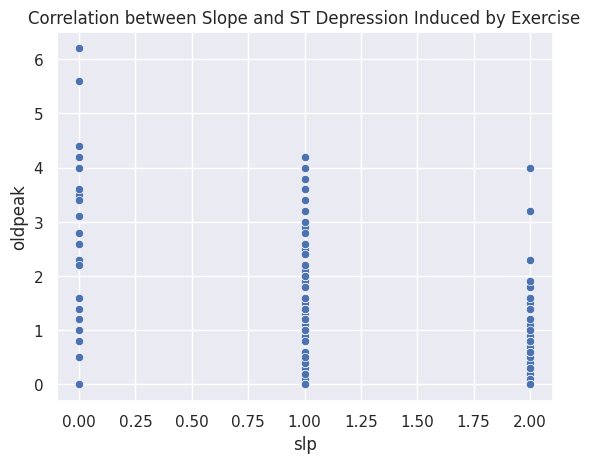

In [12]:
sns.scatterplot(x='slp', y='oldpeak', data=df)
plt.title('Correlation between Slope and ST Depression Induced by Exercise')
plt.show()

### Now let's compute and visualize correlation coefficients between each feature variable and the target variable 'output'.

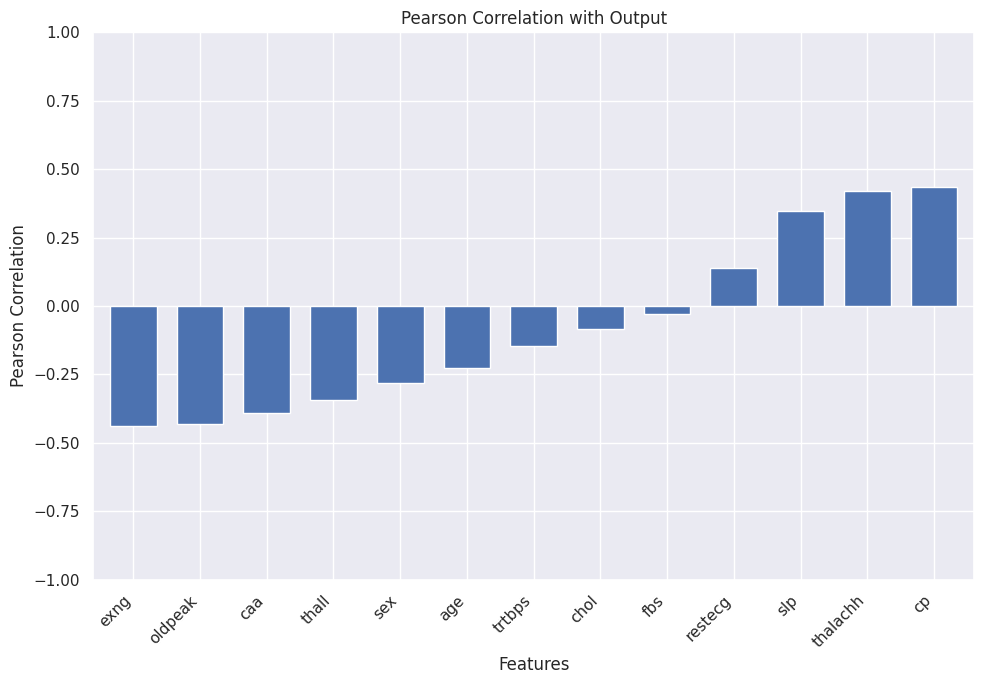

In [13]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['output'][:-1].sort_values()

#Plotting
plt.figure(figsize=(10, 7))
ax = correlations.plot(kind='bar', width=0.7)
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features',
       title='Pearson Correlation with Output')
ax.set_xticklabels(correlations.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Here, we can clearly see that the chest pain type, maximum heart rate and slope are positively correlated with experiencing a heart attack, while exercise induced angina, ST depression induced by exercise and number of major vessels are negatively correlated with our target variable.